<a href="https://colab.research.google.com/github/RodrigoMR13/Faculdade-XP-Bootcamp1/blob/main/Desafio_KMeans_Mod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Coleta dos Dados

In [ ]:
clientes = pd.read_excel('clientes.xlsx')
dados_complementares = pd.read_csv('https://raw.githubusercontent.com/ProfLeandroLessa/classroom-datasets/master/ANC/Desafio/dados_complementares.csv', sep=';')
estados_brasileiros = pd.read_csv('https://raw.githubusercontent.com/ProfLeandroLessa/classroom-datasets/master/ANC/Desafio/estados_brasileiros.csv', sep=';', encoding='latin-1')

In [ ]:
clientes.head()

,cod_cliente,cod_genero,genero,idade
0,1,0,masculino,17.0
1,2,0,masculino,28.0
2,3,0,masculino,62.0
3,4,1,feminino,55.0
4,5,0,masculino,44.0


In [ ]:
dados_complementares.head()

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
0,1,0,1502.0,1,3,1.0,5
1,2,0,9928.0,0,1,1.0,18
2,3,0,9966.0,1,4,1.0,16
3,4,0,2038.0,0,2,1.0,13
4,5,0,8216.0,1,4,1.0,13


In [ ]:
estados_brasileiros.head()

,cod_estado,estado,sigla_estado,pais
0,1,Acre,AC,Brasil
1,2,Alagoas,AL,Brasil
2,3,Amapá,AP,Brasil
3,4,Amazonas,AM,Brasil
4,5,Bahia,BA,Brasil


# Análise dos Dados Coletados

## Clientes

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  1000 non-null   int64  
 1   cod_genero   1000 non-null   int64  
 2   genero       1000 non-null   object 
 3   idade        989 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [ ]:
clientes.describe()

,cod_cliente,cod_genero,idade
count,1000.000000,1000.000000,989.000000
mean,500.500000,0.492000,48.672396
std,288.819436,0.500186,19.286196
min,1.000000,0.000000,16.000000
25%,250.750000,0.000000,32.000000
50%,500.500000,0.000000,47.000000
75%,750.250000,1.000000,63.000000
max,1000.000000,1.000000,90.000000


## Dados Complementares

In [ ]:
dados_complementares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  1000 non-null   int64  
 1   aposentado   1000 non-null   int64  
 2   salario      994 non-null    float64
 3   plano_saude  1000 non-null   int64  
 4   qtd_filhos   1000 non-null   int64  
 5   compras_3M   987 non-null    float64
 6   cod_estado   1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [ ]:
dados_complementares.describe()

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
count,1000.000000,1000.000000,994.000000,1000.000000,1000.000000,987.000000,1000.000000
mean,500.500000,0.213000,5515.832998,0.514000,2.575000,0.555218,13.988000
std,288.819436,0.409633,2398.321322,0.500054,1.694475,0.497194,7.754611
min,1.000000,0.000000,1350.000000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,0.000000,3496.750000,0.000000,1.000000,0.000000,7.000000
50%,500.500000,0.000000,5465.500000,1.000000,3.000000,1.000000,14.000000
75%,750.250000,0.000000,7445.000000,1.000000,4.000000,1.000000,21.000000
max,1000.000000,1.000000,9997.000000,1.000000,5.000000,1.000000,27.000000


## Estados

In [ ]:
estados_brasileiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cod_estado    27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          27 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
estados_brasileiros.describe()

,cod_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


# Tratamento dos Dados

## Clientes

In [ ]:
clientes.isna().sum()

cod_cliente     0
cod_genero      0
genero          0
idade          11
dtype: int64

In [ ]:
clientes.loc[clientes['idade'].isna()]

,cod_cliente,cod_genero,genero,idade
354,355,0,masculino,NaN
474,475,1,feminino,NaN
519,520,1,feminino,NaN
586,587,1,feminino,NaN
600,601,0,masculino,NaN
665,666,0,masculino,NaN
725,726,0,masculino,NaN
751,752,1,feminino,NaN
814,815,1,feminino,NaN
874,875,0,masculino,NaN


In [ ]:
media_idade_masc = clientes[clientes['genero']=='masculino'].idade.mean()
media_idade_fem = clientes[clientes['genero']=='feminino'].idade.mean()

In [ ]:
clientes.loc[(clientes['genero']=='masculino') & (clientes['idade'].isna())] = int(media_idade_masc)

In [ ]:
clientes.loc[(clientes['genero']=='feminino') & (clientes['idade'].isna())] = int(media_idade_fem)

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  1000 non-null   int64  
 1   cod_genero   1000 non-null   int64  
 2   genero       1000 non-null   object 
 3   idade        1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


## Dados Complementares

In [ ]:
dados_complementares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  1000 non-null   int64  
 1   aposentado   1000 non-null   int64  
 2   salario      994 non-null    float64
 3   plano_saude  1000 non-null   int64  
 4   qtd_filhos   1000 non-null   int64  
 5   compras_3M   987 non-null    float64
 6   cod_estado   1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [ ]:
dados_complementares.loc[dados_complementares['compras_3M'].isna()] = 0.

In [ ]:
dados_complementares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  1000 non-null   int64  
 1   aposentado   1000 non-null   int64  
 2   salario      994 non-null    float64
 3   plano_saude  1000 non-null   int64  
 4   qtd_filhos   1000 non-null   int64  
 5   compras_3M   1000 non-null   float64
 6   cod_estado   1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [ ]:
dados_complementares.dropna(subset=['salario'], inplace=True)

In [ ]:
dados_complementares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  994 non-null    int64  
 1   aposentado   994 non-null    int64  
 2   salario      994 non-null    float64
 3   plano_saude  994 non-null    int64  
 4   qtd_filhos   994 non-null    int64  
 5   compras_3M   994 non-null    float64
 6   cod_estado   994 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 62.1 KB


In [ ]:
dados_complementares.isna().sum()

cod_cliente    0
aposentado     0
salario        0
plano_saude    0
qtd_filhos     0
compras_3M     0
cod_estado     0
dtype: int64

# Manipulação e Visualização de Dados

In [ ]:
clientes_varejo = clientes.merge(dados_complementares, how='inner', on='cod_cliente')

In [ ]:
clientes_varejo = pd.merge(clientes_varejo, estados_brasileiros, on='cod_estado')

In [ ]:
clientes_varejo.head()

,cod_cliente,cod_genero,genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,estado,sigla_estado,pais
0,1,0,masculino,17.0,0,1502.0,1,3,1.0,5,Bahia,BA,Brasil
1,20,0,masculino,60.0,0,3391.0,1,4,1.0,5,Bahia,BA,Brasil
2,42,0,masculino,54.0,0,4206.0,1,5,1.0,5,Bahia,BA,Brasil
3,85,0,masculino,52.0,0,3904.0,0,1,0.0,5,Bahia,BA,Brasil
4,196,1,feminino,48.0,0,7622.0,0,2,1.0,5,Bahia,BA,Brasil


In [ ]:
clientes_varejo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 981
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_cliente   982 non-null    int64  
 1   cod_genero    982 non-null    int64  
 2   genero        982 non-null    object 
 3   idade         982 non-null    float64
 4   aposentado    982 non-null    int64  
 5   salario       982 non-null    float64
 6   plano_saude   982 non-null    int64  
 7   qtd_filhos    982 non-null    int64  
 8   compras_3M    982 non-null    float64
 9   cod_estado    982 non-null    int64  
 10  estado        982 non-null    object 
 11  sigla_estado  982 non-null    object 
 12  pais          982 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 107.4+ KB


In [ ]:
clientes_varejo[['cod_cliente', 'cod_genero', 'idade', 'compras_3M']] = clientes_varejo[['cod_cliente', 'cod_genero', 'idade', 'compras_3M']].astype('int64')

In [ ]:
clientes_varejo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 981
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_cliente   982 non-null    int64  
 1   cod_genero    982 non-null    int64  
 2   genero        982 non-null    object 
 3   idade         982 non-null    int64  
 4   aposentado    982 non-null    int64  
 5   salario       982 non-null    float64
 6   plano_saude   982 non-null    int64  
 7   qtd_filhos    982 non-null    int64  
 8   compras_3M    982 non-null    int64  
 9   cod_estado    982 non-null    int64  
 10  estado        982 non-null    object 
 11  sigla_estado  982 non-null    object 
 12  pais          982 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 107.4+ KB


In [ ]:
correlacao = clientes_varejo.corr()

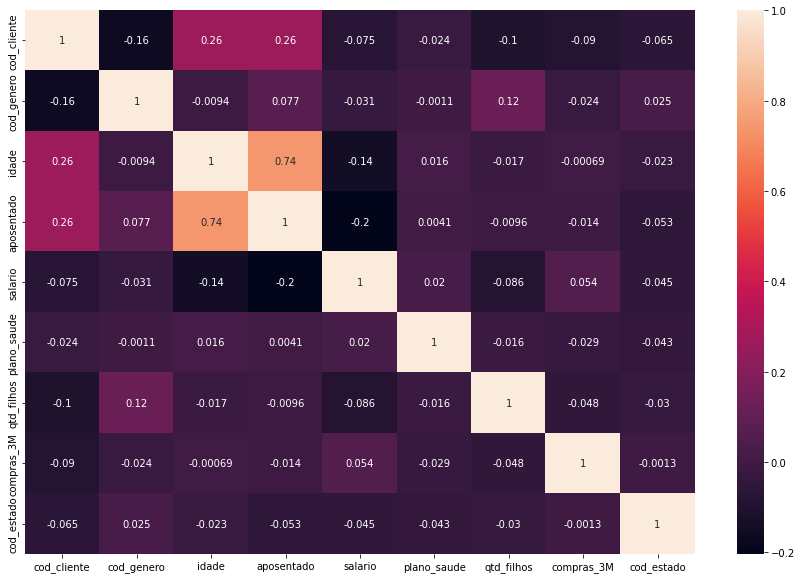

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlacao, annot=True);

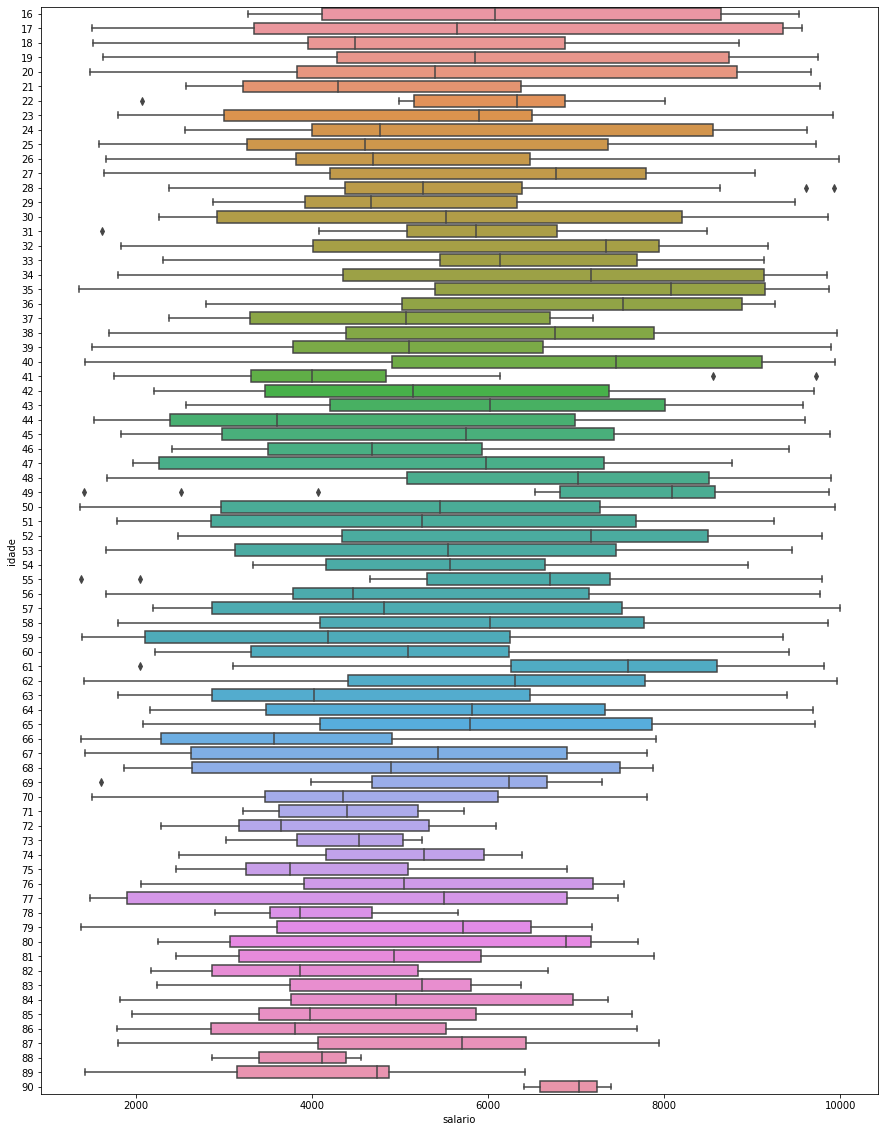

In [ ]:
plt.figure(figsize=(15,20))
sns.boxplot(x='salario', y='idade', data=clientes_varejo, orient='h')

## Gerando Gráfico de Cotovelo

In [ ]:
def calcular_wcss(dataframe):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(X=dataframe)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
clientes_idade_salario = clientes_varejo[['idade', 'salario']]

In [ ]:
wcss_clientes = calcular_wcss(clientes_idade_salario)

In [ ]:
for i in range(len(wcss_clientes)):
  print(f'O valor do WCSS para {i} cluster(s) é: {wcss_clientes[i]}')

O valor do WCSS para 0 cluster(s) é: 5659959941.629327
O valor do WCSS para 1 cluster(s) é: 1501499576.809404
O valor do WCSS para 2 cluster(s) é: 692834953.4233094
O valor do WCSS para 3 cluster(s) é: 384013262.4739782
O valor do WCSS para 4 cluster(s) é: 233372267.9364214
O valor do WCSS para 5 cluster(s) é: 161159800.07141626
O valor do WCSS para 6 cluster(s) é: 119510740.87421227
O valor do WCSS para 7 cluster(s) é: 91189051.56716956
O valor do WCSS para 8 cluster(s) é: 74835945.60125908
O valor do WCSS para 9 cluster(s) é: 60123340.182633564


In [ ]:
#grafico_cotovelo_petala = px.line(x=range(1,11), y=wcss_petala)
#grafico_cotovelo_petala.update_xaxes(title_text='Número de clusters')
#grafico_cotovelo_petala.update_yaxes(title_text='Valor de WCSS')
#grafico_cotovelo_petala.update_layout(title_text='Definindo o número de clusters', title_x=0.5)
#grafico_cotovelo_petala.show()
def gera_grafico_cotovelo(wcss_clientes):
  grafico_cotovelo = px.line(x=range(1,11), y=wcss_clientes)
  grafico_cotovelo.update_xaxes(title_text='Número de clusters')
  grafico_cotovelo.update_yaxes(title_text='Valor de WCSS')
  grafico_cotovelo.update_layout(title_text='Definindo o número de clusters', title_x=0.5)
  grafico_cotovelo.show()

In [ ]:
gera_grafico_cotovelo(wcss_clientes)

## Executando Algoritmo KMeans

In [ ]:
x_clientes = clientes_idade_salario.iloc[:].values

In [ ]:
## normalizando os dados
normalizar_dados = StandardScaler()
x_clientes = normalizar_dados.fit_transform(x_clientes)
x_clientes

array([[-1.65249698, -1.67769884],
       [ 0.58556632, -0.89084344],
       [ 0.27327842, -0.55135845],
       ...,
       [ 1.99086188,  0.00348083],
       [-1.07996916,  0.90155402],
       [-1.07996916,  0.32505435]])

In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
clientes_varejo['cluster'] = kmeans_clientes.fit_predict(x_clientes)

In [ ]:
clientes_varejo

,cod_cliente,cod_genero,genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,estado,sigla_estado,pais,cluster
0,1,0,masculino,17,0,1502.0,1,3,1,5,Bahia,BA,Brasil,1
1,20,0,masculino,60,0,3391.0,1,4,1,5,Bahia,BA,Brasil,2
2,42,0,masculino,54,0,4206.0,1,5,1,5,Bahia,BA,Brasil,2
3,85,0,masculino,52,0,3904.0,0,1,0,5,Bahia,BA,Brasil,2
4,196,1,feminino,48,0,7622.0,0,2,1,5,Bahia,BA,Brasil,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,885,0,masculino,78,1,3695.0,0,2,0,3,Amapá,AP,Brasil,2
978,902,0,masculino,39,0,8089.0,1,4,1,3,Amapá,AP,Brasil,3
979,929,1,feminino,87,1,5538.0,0,4,1,3,Amapá,AP,Brasil,2
980,947,0,masculino,28,0,7694.0,1,2,1,3,Amapá,AP,Brasil,3


In [ ]:
centroides_clientes = kmeans_clientes.cluster_centers_
centroides_clientes

array([[ 0.81978224,  0.64862884],
       [-0.7595603 , -0.77551928],
       [ 1.066537  , -0.91015035],
       [-0.7363742 ,  1.05309377]])

In [ ]:
#grafico_petala = px.scatter(x=x_petala[:,0], y=x_petala[:,1], color = label_cluster_petala)
#grafico_centroide_petala = px.scatter(x=centroides_petala[:,0], y=centroides_petala[:,1], size=[7,7,7])
#grafico_final = go.Figure(data=grafico_petala.data + grafico_centroide_petala.data)
#grafico_final.update_xaxes(title_text='Comprimento')
#grafico_final.update_yaxes(title_text='Largura')
#grafico_final.update_layout(title_text='Clusters', title_x=0.5)
#grafico_final.show()

def gera_grafico(x, y, color, x_centroide, y_centroide):
  grafico = px.scatter(x=x,
                       y=y,
                       color=color)
  grafico_centroide = px.scatter(x=x_centroide,
                                 y=y_centroide)
  grafico_final = go.Figure(data=grafico.data + grafico_centroide.data)
  grafico_final.update_xaxes(title_text='Idade')
  grafico_final.update_yaxes(title_text='Salario')
  grafico_final.update_layout(title_text='Clusters', title_x=0.5)
  grafico_final.show()

In [ ]:
x = x_clientes[:,0]
y = x_clientes[:,1]
color = clientes_varejo['cluster']
x_centroide = centroides_clientes[:,0]
y_centroide = centroides_clientes[:,1]

In [ ]:
gera_grafico(x, y, color, x_centroide, y_centroide)

In [ ]:
clientes_varejo['salario'].mean()

5529.643584521385

In [ ]:
clientes_masc = clientes[clientes['genero']=='masculino']

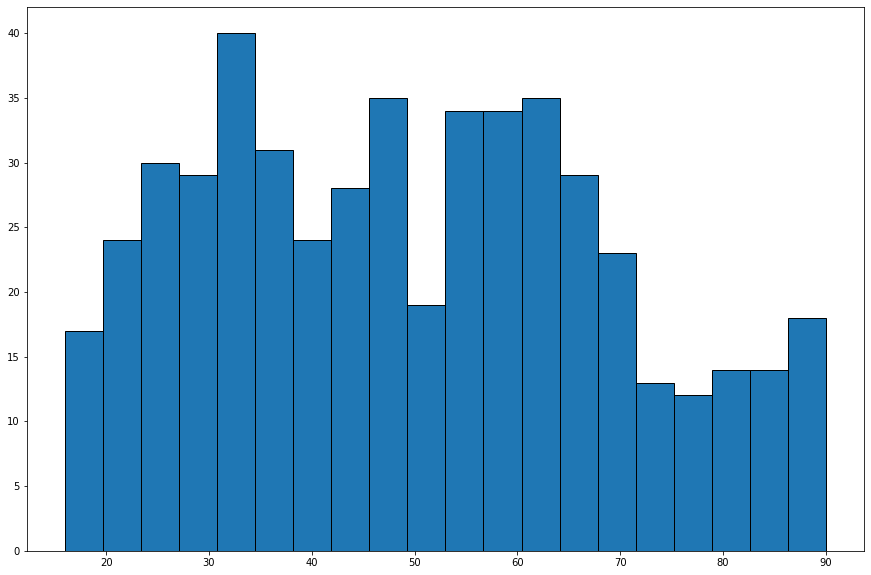

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(clientes_masc['idade'], bins=20, edgecolor='black');

In [ ]:
clientes_varejo.head()

,cod_cliente,cod_genero,genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,estado,sigla_estado,pais,cluster
0,1,0,masculino,17,0,1502.0,1,3,1,5,Bahia,BA,Brasil,1
1,20,0,masculino,60,0,3391.0,1,4,1,5,Bahia,BA,Brasil,2
2,42,0,masculino,54,0,4206.0,1,5,1,5,Bahia,BA,Brasil,2
3,85,0,masculino,52,0,3904.0,0,1,0,5,Bahia,BA,Brasil,2
4,196,1,feminino,48,0,7622.0,0,2,1,5,Bahia,BA,Brasil,3


In [ ]:
clientes_varejo.groupby(by='cluster').mean()

,cod_cliente,cod_genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
cluster,,,,,,,,,
0,498.635514,0.490654,64.500000,0.369159,7086.803738,0.570093,2.560748,0.556075,13.140187
1,455.283688,1.503546,34.156028,0.021277,3667.858156,0.478723,2.829787,0.528369,14.304965
2,602.059091,0.436364,69.240909,0.586364,3344.650000,0.500000,2.577273,0.554545,14.418182
3,440.507519,1.413534,34.601504,0.000000,8057.800752,0.503759,2.375940,0.582707,14.278195


In [ ]:
clientes_varejo['qtd_filhos'].unique()

array([3, 4, 5, 1, 2, 0])

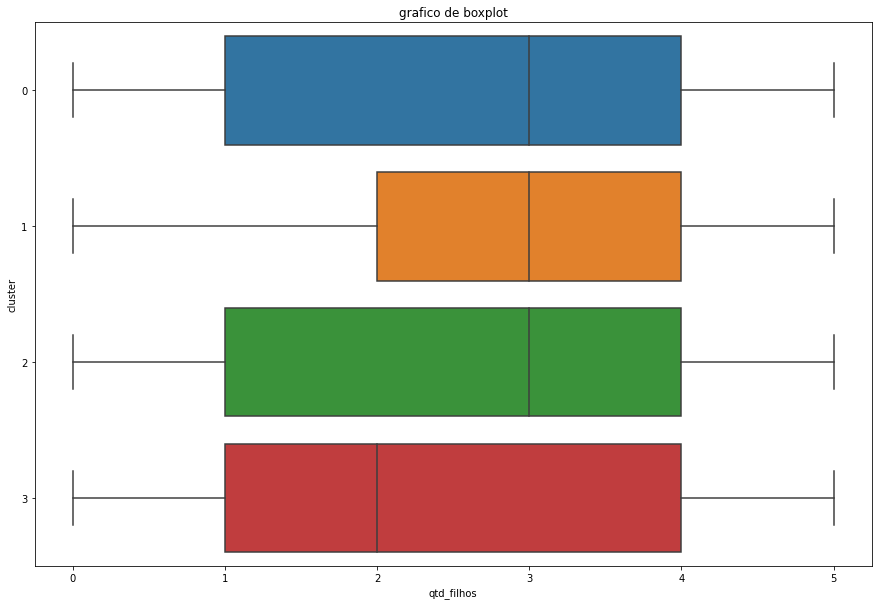

In [ ]:
plt.figure(figsize=(15,10))
plt.title('grafico de boxplot')
sns.boxplot(x='qtd_filhos', y='cluster', data=clientes_varejo, orient='h')

In [ ]:
clientes_varejo.loc[(clientes_varejo['cluster']==1) & (clientes_varejo['genero']=='feminino')]

,cod_cliente,cod_genero,genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,estado,sigla_estado,pais,cluster
29,66,1,feminino,25,0,2759.0,1,3,1,18,Piauí,PI,Brasil,1
35,252,1,feminino,46,0,4076.0,1,3,1,18,Piauí,PI,Brasil,1
37,284,1,feminino,47,0,2356.0,0,3,0,18,Piauí,PI,Brasil,1
38,327,1,feminino,28,0,3047.0,0,3,0,18,Piauí,PI,Brasil,1
39,339,1,feminino,43,0,3728.0,1,0,0,18,Piauí,PI,Brasil,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,489,1,feminino,31,0,4079.0,0,4,1,3,Amapá,AP,Brasil,1
954,506,1,feminino,50,0,4949.0,0,0,0,3,Amapá,AP,Brasil,1
963,656,1,feminino,32,0,3705.0,0,5,0,3,Amapá,AP,Brasil,1
967,707,1,feminino,45,0,1833.0,1,5,0,3,Amapá,AP,Brasil,1


In [ ]:
clientes_varejo.groupby(by='estado').mean().sort_values(by='salario', ascending=False)

,cod_cliente,cod_genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,cluster
estado,,,,,,,,,,
Acre,449.600000,0.466667,50.433333,0.300000,6194.633333,0.633333,2.533333,0.533333,1.0,1.433333
Pará,505.032258,0.516129,48.129032,0.193548,6182.612903,0.548387,2.580645,0.612903,14.0,1.806452
Paraná,460.317073,0.512195,48.219512,0.219512,6173.170732,0.585366,2.341463,0.658537,16.0,1.756098
Alagoas,591.294118,0.529412,50.588235,0.294118,5971.264706,0.588235,2.176471,0.558824,2.0,1.500000
Mato Grosso,470.861111,0.527778,47.833333,0.166667,5969.166667,0.638889,2.361111,0.500000,11.0,1.750000
São Paulo,455.457143,0.600000,50.257143,0.142857,5952.914286,0.485714,2.314286,0.485714,25.0,1.885714
Ceará,521.279070,0.558140,51.093023,0.139535,5928.209302,0.534884,2.511628,0.534884,6.0,1.325581
Amazonas,527.410256,0.461538,46.923077,0.230769,5900.153846,0.461538,3.128205,0.615385,4.0,1.410256
Santa Catarina,515.896552,0.448276,46.758621,0.241379,5679.068966,0.448276,2.517241,0.517241,24.0,1.482759


In [ ]:
clientes_varejo.groupby(by='cluster').sum().sort_values(by='aposentado')

,cod_cliente,cod_genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
cluster,,,,,,,,,
3,117175,376,9204,0,2143375.0,134,632,155,3798
1,128390,424,9632,6,1034336.0,135,798,149,4034
0,106708,105,13803,79,1516576.0,122,548,119,2812
2,132453,96,15233,129,735823.0,110,567,122,3172


In [ ]:
clientes_varejo.groupby(by='estado').sum().sort_values(by='plano_saude', ascending=False)

,cod_cliente,cod_genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,cluster
estado,,,,,,,,,,
Distrito Federal,22915,21,1981,7,222002.0,25,100,24,287,64
Paraná,18873,21,1977,9,253100.0,24,96,27,656,72
Piauí,21141,23,2045,6,223704.0,24,111,21,792,53
Rio de Janeiro,18390,21,1820,6,220812.0,23,121,22,779,54
Ceará,22415,24,2197,6,254913.0,23,108,23,258,57
Mato Grosso,16951,19,1722,6,214890.0,23,85,18,396,63
Maranhão,20098,17,2032,10,204897.0,22,119,24,420,60
Paraíba,16750,296,1967,12,200306.0,22,109,20,600,60
Sergipe,21270,14,2225,6,223248.0,21,114,32,1222,61


In [ ]:
clientes_varejo.loc[ (clientes_varejo['compras_3M'] == 1) & (clientes_varejo['aposentado'] == 1) ]

,cod_cliente,cod_genero,genero,idade,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,estado,sigla_estado,pais,cluster
8,429,0,masculino,68,1,6155.0,0,4,1,5,Bahia,BA,Brasil,0
14,493,1,feminino,70,1,7041.0,0,4,1,5,Bahia,BA,Brasil,0
18,637,1,feminino,66,1,4838.0,1,5,1,5,Bahia,BA,Brasil,2
21,734,0,masculino,79,1,7176.0,1,5,1,5,Bahia,BA,Brasil,0
23,814,0,masculino,76,1,7546.0,0,1,1,5,Bahia,BA,Brasil,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,647,1,feminino,66,1,3195.0,1,3,1,3,Amapá,AP,Brasil,2
968,712,1,feminino,77,1,4392.0,0,5,1,3,Amapá,AP,Brasil,2
973,833,1,feminino,76,1,7275.0,1,2,1,3,Amapá,AP,Brasil,0
976,873,1,feminino,85,1,3896.0,1,2,1,3,Amapá,AP,Brasil,2


In [ ]:
clientes_varejo.loc[ (clientes_varejo['compras_3M'] == 1) & (clientes_varejo['aposentado'] == 1) ].groupby(['cluster', 'genero']).sum()

cod_cliente  cod_genero  idade  aposentado   salario  \
cluster genero                                                            
0       feminino         17421          27   2082          27  180873.0   
        masculino        11617           0   1331          18  125992.0   
2       feminino         20448          31   2392          31  107577.0   
        masculino        26181           0   3045          40  131754.0   

                   plano_saude  qtd_filhos  compras_3M  cod_estado  
cluster genero                                                      
0       feminino            14          66          27         408  
        masculino           11          42          18         160  
2       feminino            14          76          31         348  
        masculino           21          87          40         520

In [ ]:
clientes_varejo.groupby(['cluster', 'genero']).mean()

cod_cliente  cod_genero      idade  aposentado  \
cluster genero                                                      
0       feminino    494.600000         1.0  64.342857    0.352381   
        masculino   502.522936         0.0  64.651376    0.385321   
1       47           47.000000        47.0  47.000000    1.000000   
        feminino    440.802817         1.0  33.352113    0.000000   
        masculino   488.910448         0.0  34.432836    0.000000   
2       feminino    617.781250         1.0  69.187500    0.572917   
        masculino   589.887097         0.0  69.282258    0.596774   
3       49           49.000000        49.0  49.000000    0.000000   
        feminino    447.274809         1.0  34.450382    0.000000   
        masculino   448.746154         0.0  34.200000    0.000000   

                       salario  plano_saude  qtd_filhos  compras_3M  \
cluster genero                                                        
0       feminino   7007.142857     0.561905    2.447619    0.523810   
        masculino  7163.541284     0.577982    2.669725    0.587156   
1       47         1965.000000     1.000000    5.000000    0.000000   
        feminino   3703.154930     0.478873    2.936620    0.471831   
        masculino  3706.701493     0.455224    2.619403    0.611940   
2       feminino   3340.354167     0.427083    2.635417    0.562500   
        masculino  3347.975806     0.556452    2.532258    0.548387   
3       49         8087.000000     0.000000    4.000000    1.000000   
        feminino   8003.603053     0.442748    2.396947    0.572519   
        masculino  8111.292308     0.584615    2.292308    0.576923   

                   cod_estado  
cluster genero                 
0       feminino    14.057143  
        masculino   12.256881  
1       47          15.000000  
        feminino    13.880282  
        masculino   14.723881  
2       feminino    14.697917  
        masculino   14.201613  
3       49          17.000000  
        feminino    13.572519  
        masculino   14.884615

In [ ]:
clientes_varejo.groupby(['cluster', 'genero']).count()

cod_cliente  cod_genero  idade  aposentado  salario  \
cluster genero                                                           
0       feminino           105         105    105         105      105   
        masculino          109         109    109         109      109   
1       47                   6           6      6           6        6   
        feminino           142         142    142         142      142   
        masculino          134         134    134         134      134   
2       feminino            96          96     96          96       96   
        masculino          124         124    124         124      124   
3       49                   5           5      5           5        5   
        feminino           131         131    131         131      131   
        masculino          130         130    130         130      130   

                   plano_saude  qtd_filhos  compras_3M  cod_estado  estado  \
cluster genero                                                               
0       feminino           105         105         105         105     105   
        masculino          109         109         109         109     109   
1       47                   6           6           6           6       6   
        feminino           142         142         142         142     142   
        masculino          134         134         134         134     134   
2       feminino            96          96          96          96      96   
        masculino          124         124         124         124     124   
3       49                   5           5           5           5       5   
        feminino           131         131         131         131     131   
        masculino          130         130         130         130     130   

                   sigla_estado  pais  
cluster genero                         
0       feminino            105   105  
        masculino           109   109  
1       47                    6     6  
        feminino            142   142  
        masculino           134   134  
2       feminino             96    96  
        masculino           124   124  
3       49                    5     5  
        feminino            131   131  
        masculino           130   130